In [0]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import sys

constant = 101*101

In [0]:
class Node:
    def __init__(self,i,j,g,h,previous,counter,largerG):
        self.i = i
        self.j = j
        self.g = g
        self.h = h
        self.f = self.g + self.h
        self.h_new = None
        self.previous = previous
        self.counter = counter
        self.isBlocked = False
        # self.priority = self.f
        self.largerG = largerG
        if self.largerG:
            self.priority = constant*self.f - self.g
        else:
            self.priority = constant*self.f + self.g

    def updateFValue(self):
        self.f = (self.g + self.h_new if self.h_new else self.g+self.h)
        if self.largerG:
            self.priority = constant*self.f - self.g
        else:
            self.priority = constant*self.f + self.g

        # self.priority = self.f


In [0]:
class MinHeap:
    def __init__(self):
        self.heap = []
    
    def isEmpty(self):
        return len(self.heap) == 0
    
    def addNode(self, node):
        self.heap.append(node)
        self._heapifyUp()
        return self.heap

    def getMinNode(self):
        return self.heap[0]
    
    def popMinNode(self):
        if len(self.heap) == 0:
            return None
        else:
            minEle = self.heap[0]
            self.heap[0] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDown()
            return minEle

    def removeNode(self, node):
        z = search(Node)
        if z:
            removed = self.heap[z]
            self.heap[z] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDownInd(z)
            return removed
    
    def upsert(self,oldNode,newNode):
        z = self.search(oldNode)
        if z:
            self.heap[z] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDownInd(z)
            self.addNode(newNode)
            return self.heap
        else:
            self.addNode(newNode)
            return self.heap
        
    def search(self, node):
        heap = self.heap
        for x in range(0,len(heap)):
            if self.heap[x].i == node.i and self.heap[x].j == node.j:
                return x
                
    def _heapifyUpInd(self, i):
        heap = self.heap
        size = i
        if len(heap) == 1 :
            return heap
        else:
            while size//2 > 0:
                parent = (size)//2 - 1
                curLast = size-1
                if heap[curLast].priority < heap[parent].priority:
                    swpNode = heap[curLast]
                    heap[curLast] = heap[parent]
                    heap[parent] = swpNode
                size = size//2
            return heap

    def _heapifyUp(self):
        self._heapifyUpInd(len(self.heap))
    
    def _heapifyDownInd(self,ind):
        size = len(self.heap)
        curr = ind
        while (curr+1)*2 <= size:
            minInd = self._nextMinNode(curr)      
            if self.heap[minInd].priority < self.heap[curr].priority:
                swpNode = self.heap[minInd]
                self.heap[minInd] = self.heap[curr]
                self.heap[curr] = swpNode
            curr = minInd
        return self.heap

    def _heapifyDown(self):
        self._heapifyDownInd(0)

    def _nextMinNode(self, index):
        if (index+1)*2 + 1 > len(self.heap):
            return index*2 + 1 
        else:
            if self.heap[index*2 + 1].priority < self.heap[index*2 + 2].priority:
                return index*2 + 1
            else:
                return index*2 + 2
    
    def printHeap(self):
        heap = self.heap
        for x in range(0,len(heap)):
            print("i-",heap[x].i,"j-",heap[x].j,"f-",heap[x].f, "p-",heap[x].priority)
        
    def size(self):
        return len(self.heap)


In [0]:
def generate_random_matrix(input,visited,i,j):
    visited[i][j] = 1
    input[i][j] = 1

    if  j + 1 < len(input) and input[i][j+1] == 0: 
        rand_value = get_rand_value()
        if rand_value == 1:
          generate_random_matrix(input,visited,i,j+1)
        else:
          visited[i][j+1] = 1
          input[i][j+1] = -1
      
    if  j - 1 >= 0 and input[i][j-1] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i,j-1)
        else:
            visited[i][j-1] = 1
            input[i][j-1] = -1

    if i -1 >=0 and input[i-1][j] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i-1,j)
        else:
            visited[i-1][j] = 1
            input[i-1][j] = -1

    if i + 1 < len(input) and input[i+1][j] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i+1,j)
        else:
            visited[i+1][j] = 1
            input[i+1][j] = -1

def get_rand_value():
    rand_value = random.randint(0,9)
    if rand_value in [0,2]:
        return -1
    else:
        return 1

def get_unvisited_indices(visited):
    for i in range(0,len(visited)):
        for j in range(0,len(visited)):
            if visited[i][j] == 0:
                return i,j
    return -1,-1


In [0]:
def updateCounter(i,j,nodes,counter):
    if i >= 0 and i < len(nodes) and j>=0 and j < len(nodes) and nodes[i][j].counter != counter:
        nodes[i][j].counter = counter
        nodes[i][j].g = sys.maxsize - 1000
        nodes[i][j].updateFValue()
        # if nodes[i][j].h_new != None:
        #     nodes[i][j].f = nodes[i][j].g + nodes[i][j].h_new
        # else:
        #     nodes[i][j].f = nodes[i][j].g + nodes[i][j].h
        nodes[i][j].previous = None


def UpdateNeighborNode(open_list,nodes,current_node):
    i = current_node.i
    j = current_node.j
    


def addValidNeighbors(open_list, nodes, current_node, counter):
    i = current_node.i
    j = current_node.j
    updateCounter(i - 1,j,nodes,counter)
    if i - 1 >= 0 and current_node.g + 1 < nodes[i - 1][j].g and nodes[i - 1][j].isBlocked == False:
        nodes[i - 1][j].g = current_node.g + 1
        nodes[i - 1][j].updateFValue()
        nodes[i - 1][j].previous = nodes[i][j]
        open_list.upsert(nodes[i-1][j],nodes[i-1][j])
    
    updateCounter(i + 1,j,nodes,counter)
    if i + 1 < len(maze) and current_node.g + 1 < nodes[i + 1][j].g and nodes[i + 1][j].isBlocked == False:
        nodes[i + 1][j].g = current_node.g + 1
        nodes[i + 1][j].updateFValue()
        nodes[i + 1][j].previous = nodes[i][j]
        open_list.upsert(nodes[i+1][j],nodes[i+1][j])

    updateCounter(i,j - 1,nodes,counter)
    if j - 1 >= 0 and current_node.g + 1 < nodes[i][j - 1].g and nodes[i][j - 1].isBlocked == False:
        nodes[i][j - 1].g = current_node.g + 1
        nodes[i][j-1].updateFValue()
        nodes[i][j - 1].previous = nodes[i][j]
        open_list.upsert(nodes[i][j-1],nodes[i][j-1])

    updateCounter(i,j + 1,nodes,counter)
    if j + 1 < len(maze) and current_node.g + 1 < nodes[i][j + 1].g and nodes[i][j + 1].isBlocked == False:
        nodes[i][j + 1].g = current_node.g + 1
        nodes[i][j+1].updateFValue()
        nodes[i][j + 1].previous = nodes[i][j]
        open_list.upsert(nodes[i][j+1],nodes[i][j+1])


def computePath(maze,goal_node,nodes,open_list,counter,expanded_nodes):
    
    while open_list.size() > 0:   
        current_node = open_list.popMinNode()
        expanded_nodes.append(current_node)
        print('current node',current_node.i,current_node.j)
        if nodes[goal_node.i][goal_node.j].priority > current_node.priority:
            addValidNeighbors(open_list,nodes, current_node, counter)
        else:
            print('Goal node is reached')
            return True
    return False

def updateIsBlocked(nodes,i,j,value):
    if i >= 0 and i < len(nodes) and j>=0 and j < len(nodes):
        nodes[i][j].isBlocked = value

def updateBlockedNeighbors(node,nodes):
    i = node.i
    j = node.j
    if i-1 >= 0 and maze[i-1][j] == -1:
        nodes[i-1][j].isBlocked = True
    if j-1 >= 0 and maze[i][j-1] == -1:
        nodes[i][j-1].isBlocked = True
    if i+1 < len(nodes) and maze[i+1][j] == -1:
        nodes[i+1][j].isBlocked = True
    if j+1 < len(nodes) and maze[i][j+1] == -1:
        nodes[i][j+1].isBlocked = True


def traverseNodes(goal_node,maze,start_node,nodes):
    # generate_dup_maze(goal_node,maze,current_node)
    # Need to add logic to see we have to open the adjacent nodes when the agent
    # is travelling

    node = goal_node
    node_list = list()
    path_visualization_matrix = [0] * len(maze)
    distance_from_goal = 0
    for i in range(0,size):
      path_visualization_matrix[i] = [0] * len(maze)

    while node != start_node:
            print('traversing nodes in reverse order ',node.i,node.j)
            path_visualization_matrix[node.i][node.j] = 1        
            node_list.append(node)
            old_node = node
            node = node.previous
            old_node.previous = None
            distance_from_goal = distance_from_goal + 1
    
    path_visualization_matrix[node.i][node.j] = 1
    showMaze(path_visualization_matrix,1)
    # plt.imshow(path_visualization_matrix)
    # plt.show()
    node_list.append(node)
    
    print('traversing nodes in reverse order ',node.i,node.j)    
    previous_node = node_list.pop()
    maze[previous_node.i][previous_node.j] = 2
        
    while len(node_list) > 0:
        current_node = node_list.pop()
        print('traversing nodes ',current_node.i,current_node.j)
        updateBlockedNeighbors(current_node,nodes)
        if maze[current_node.i][current_node.j] == -1:
            print('Blocked at node ',previous_node.i,previous_node.j)
            current_node = previous_node
            break
        else:
            maze[current_node.i][current_node.j] = 2
            current_node.previous = previous_node
            previous_node = current_node
    # plt.imshow(maze)
    # plt.show()
    showMaze(maze,1)
    return distance_from_goal,current_node

def updateHNew(expanded_nodes,distance_from_destination):
    for node in expanded_nodes:
        if distance_from_destination != None:
            node.h_new = distance_from_destination - node.g
        else:
            node.h_new = None

def AStarSearch(nodes,current_node,maze,goal_node,open_list,adaptive):
    expanded_nodes = []
    counter = 0
    total_expanded_nodes = 0
    while current_node.i != goal_node.i or current_node.j != goal_node.j:
        counter = counter + 1
        maze[current_node.i][current_node.j] = 2
        current_node.g = 0
        current_node.updateFValue()
        current_node.counter = counter
        i = current_node.i
        j = current_node.j
        if i - 1 >= 0 and maze[i - 1][j] == -1:
            updateIsBlocked(nodes,i - 1,j,True)
        elif i - 1 >= 0:
            nodes[i - 1][j].g = 1
            nodes[i - 1][j].updateFValue()
            nodes[i - 1][j].counter = counter
            nodes[i - 1][j].previous = current_node
            open_list.addNode(nodes[i-1][j])
        if i + 1 < len(maze) and maze[i + 1][j] == -1:
            updateIsBlocked(nodes,i + 1,j,True)
        elif i + 1 < len(maze):
            nodes[i + 1][j].g = 1
            nodes[i + 1][j].updateFValue()
            nodes[i + 1][j].counter = counter
            nodes[i + 1][j].previous = current_node
            open_list.addNode(nodes[i+1][j])
        if j - 1 >= 0 and maze[i][j - 1] == -1:
            updateIsBlocked(nodes,i,j - 1,True)
        elif j - 1 >= 0:
            nodes[i][j - 1].g = 1
            nodes[i][j - 1].updateFValue()
            nodes[i][j - 1].counter = counter
            nodes[i][j - 1].previous = current_node
            open_list.addNode(nodes[i][j-1])
        if j + 1 < len(maze) and maze[i][j + 1] == -1:
            updateIsBlocked(nodes,i,j + 1,True)
        elif j + 1 < len(maze):
            nodes[i][j + 1].g = 1
            nodes[i][j + 1].updateFValue()
            nodes[i][j + 1].counter = counter
            nodes[i][j + 1].previous = current_node
            open_list.addNode(nodes[i][j+1])

        goal_node.g = sys.maxsize - 1000
        nodes[goal_node.i][goal_node.j].updateFValue()
        old_expanded_nodes = expanded_nodes
        expanded_nodes = []
        can_reach = computePath(maze,goal_node,nodes,open_list,counter,expanded_nodes)
        if adaptive:
            updateHNew(old_expanded_nodes,None)
        total_expanded_nodes = total_expanded_nodes + len(expanded_nodes)
        open_list = MinHeap()
        if can_reach == False:
            print('cannot reach destination')
            break
        distance_from_node,current_node = traverseNodes(goal_node,maze,current_node,nodes)
        if adaptive:
            updateHNew(expanded_nodes,distance_from_node)
        
        print('new current node is',current_node.i,current_node.j)
    print('Total number of expanded nodes in the search process ',total_expanded_nodes)
    return total_expanded_nodes


In [0]:
def showMaze(maze, show):
    if show:
        maze = np.array(maze)
        plt.imshow(maze)
        # plt.gca().axes.get_yaxis().set_visible(False)
        # plt.gca().axes.get_xaxis().set_visible(False)
        locator = matplotlib.ticker.MultipleLocator(5)
        plt.gca().yaxis.set_major_locator(locator)
        formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
        plt.gca().yaxis.set_major_formatter(formatter)
        plt.show()

[[1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1], [1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1], [1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1], [-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1

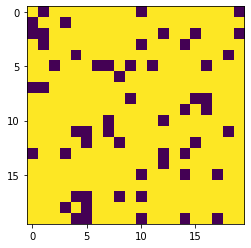

current node 16 0
current node 15 1
current node 17 0
current node 15 2
current node 16 1
current node 17 1
current node 16 2
current node 18 0
current node 15 3
current node 19 0
current node 15 4
current node 18 1
current node 16 3
current node 17 2
current node 17 3
current node 19 1
current node 18 2
current node 16 4
current node 15 5
current node 16 5
current node 15 6
current node 18 3
current node 17 4
current node 19 2
current node 19 3
current node 16 6
current node 18 4
current node 15 7
current node 17 5
current node 16 7
current node 15 8
current node 19 4
current node 17 6
current node 18 5
current node 18 6
current node 15 9
current node 16 8
current node 17 7
current node 19 5
current node 19 6
current node 18 7
current node 17 8
current node 16 9
current node 15 10
current node 16 10
current node 19 7
current node 18 8
current node 17 9
current node 15 11
current node 16 11
current node 15 12
current node 18 9
current node 19 8
current node 17 10
current node 19 9
curr

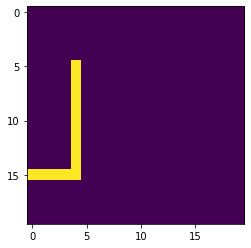

traversing nodes in reverse order  15 0
traversing nodes  15 1
traversing nodes  15 2
traversing nodes  15 3
traversing nodes  15 4
traversing nodes  14 4
traversing nodes  13 4
traversing nodes  12 4
traversing nodes  11 4
Blocked at node  12 4


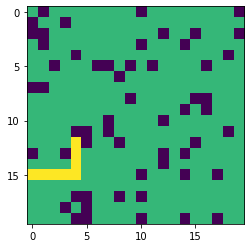

new current node is 12 4
current node 13 4
current node 14 4
current node 13 5
current node 15 4
current node 13 6
current node 14 5
current node 13 7
current node 15 5
current node 16 4
current node 14 6
current node 15 6
current node 13 8
current node 17 4
current node 16 5
current node 14 7
current node 15 7
current node 13 9
current node 18 4
current node 14 8
current node 16 6
current node 17 5
current node 13 10
current node 16 7
current node 15 8
current node 18 5
current node 14 9
current node 17 6
current node 19 4
current node 13 11
current node 19 5
current node 16 8
current node 15 9
current node 18 6
current node 17 7
current node 14 10
current node 17 8
current node 18 7
current node 13 12
current node 16 9
current node 14 11
current node 15 10
current node 19 6
current node 15 11
current node 19 7
current node 14 12
current node 17 9
current node 18 8
current node 16 10
current node 13 13
current node 18 9
current node 19 8
current node 15 12
current node 13 14
current n

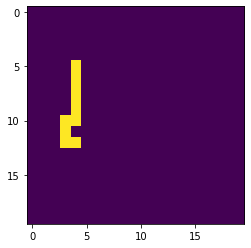

traversing nodes in reverse order  12 4
traversing nodes  12 3
traversing nodes  11 3
traversing nodes  10 3
traversing nodes  10 4
traversing nodes  9 4
traversing nodes  8 4
traversing nodes  7 4
traversing nodes  6 4
traversing nodes  5 4


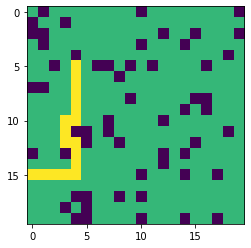

new current node is 5 4
Total number of expanded nodes in the search process  558
[[1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1], [1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1], [1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, -1, 1, 2, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1], [1, 1, 1, 1, 2, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-1, -1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 2, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1], [1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1], [1, 1, 1, 2, 2, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 2, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, 2, 2, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1], [-1, 1, 1, -1, 2, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1], [1, 1, 

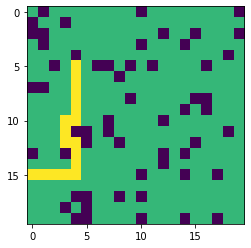

[[1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1], [1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1], [1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1], [-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1

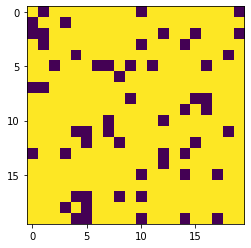

current node 16 0
current node 15 1
current node 17 0
current node 15 2
current node 16 1
current node 17 1
current node 16 2
current node 18 0
current node 15 3
current node 19 0
current node 15 4
current node 18 1
current node 16 3
current node 17 2
current node 17 3
current node 19 1
current node 18 2
current node 16 4
current node 15 5
current node 16 5
current node 15 6
current node 18 3
current node 17 4
current node 19 2
current node 19 3
current node 16 6
current node 18 4
current node 15 7
current node 17 5
current node 16 7
current node 15 8
current node 19 4
current node 17 6
current node 18 5
current node 18 6
current node 15 9
current node 16 8
current node 17 7
current node 19 5
current node 19 6
current node 18 7
current node 17 8
current node 16 9
current node 15 10
current node 16 10
current node 19 7
current node 18 8
current node 17 9
current node 15 11
current node 16 11
current node 15 12
current node 18 9
current node 19 8
current node 17 10
current node 19 9
curr

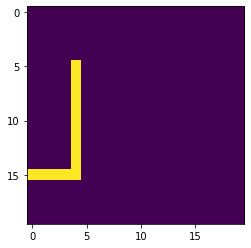

traversing nodes in reverse order  15 0
traversing nodes  15 1
traversing nodes  15 2
traversing nodes  15 3
traversing nodes  15 4
traversing nodes  14 4
traversing nodes  13 4
traversing nodes  12 4
traversing nodes  11 4
Blocked at node  12 4


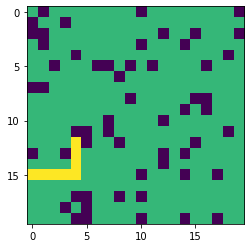

new current node is 12 4
current node 13 4
current node 12 3
current node 13 5
current node 11 3
current node 13 6
current node 10 3
current node 12 6
current node 13 7
current node 10 4
current node 9 3
current node 10 5
current node 13 8
current node 9 4
current node 8 3
current node 11 6
current node 12 7
current node 9 5
current node 12 8
current node 10 6
current node 8 4
current node 13 9
current node 11 7
current node 7 3
current node 9 6
current node 13 10
current node 7 4
current node 12 9
current node 6 3
current node 11 8
current node 10 7
current node 8 5
current node 7 5
current node 7 6
current node 6 5
current node 5 5
current node 5 6
current node 5 7
current node 5 8
current node 5 9
current node 5 10
current node 5 11
current node 5 12
current node 5 13
current node 5 14
current node 5 15
current node 5 16
current node 5 17
current node 5 18
current node 5 19
current node 5 3
current node 5 4
Goal node is reached
traversing nodes in reverse order  5 4
traversing nodes

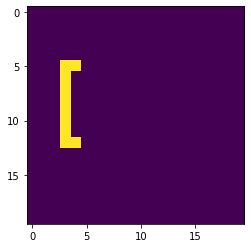

traversing nodes in reverse order  12 4
traversing nodes  12 3
traversing nodes  11 3
traversing nodes  10 3
traversing nodes  9 3
traversing nodes  8 3
traversing nodes  7 3
traversing nodes  6 3
traversing nodes  5 3
traversing nodes  5 4


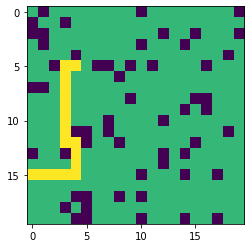

new current node is 5 4
Total number of expanded nodes in the search process  335
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1], [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1], [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1], [1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1], [1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1], [1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1], [1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1], [1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1

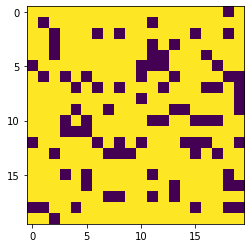

current node 12 3
current node 13 3
current node 12 4
current node 13 4
current node 12 5
current node 14 3
current node 14 4
current node 13 5
current node 12 6
current node 15 3
current node 12 7
current node 13 6
current node 14 5
current node 16 3
current node 15 4
current node 13 7
current node 12 8
current node 17 3
current node 15 5
current node 14 6
current node 16 4
current node 13 8
current node 14 7
current node 15 6
current node 17 4
current node 16 5
current node 12 9
current node 18 3
current node 17 5
current node 12 10
current node 19 3
current node 13 9
current node 18 4
current node 14 8
current node 16 6
current node 15 7
current node 16 7
current node 13 10
current node 12 11
current node 19 4
current node 14 9
current node 15 8
current node 18 5
current node 17 6
current node 18 6
current node 14 10
current node 13 11
current node 12 12
current node 19 5
current node 16 8
current node 15 9
current node 17 7
current node 17 8
current node 15 10
current node 12 13
cu

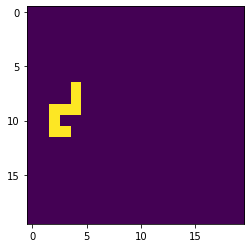

traversing nodes in reverse order  11 3
traversing nodes  11 2
traversing nodes  10 2
traversing nodes  9 2
traversing nodes  9 3
traversing nodes  9 4
Blocked at node  9 3


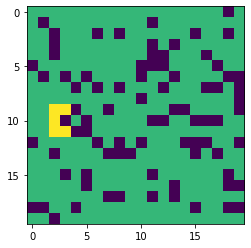

new current node is 9 3
current node 8 3
current node 9 2
current node 8 4
current node 10 2
current node 8 5
current node 11 2
current node 9 5
current node 8 6
current node 11 3
current node 12 2
current node 12 3
current node 9 6
current node 8 7
current node 13 2
current node 10 5
current node 13 3
current node 10 6
current node 12 4
current node 9 7
current node 8 8
current node 11 5
current node 14 2
current node 13 4
current node 8 9
current node 11 6
current node 15 2
current node 9 8
current node 10 7
current node 14 3
current node 12 5
current node 16 2
current node 9 9
current node 15 3
current node 10 8
current node 8 10
current node 11 7
current node 12 6
current node 13 5
current node 14 4
current node 14 5
current node 8 11
current node 16 3
current node 9 10
current node 11 8
current node 10 9
current node 15 4
current node 17 2
current node 13 6
current node 12 7
current node 14 6
current node 9 11
current node 17 3
current node 18 2
current node 15 5
current node 11 9

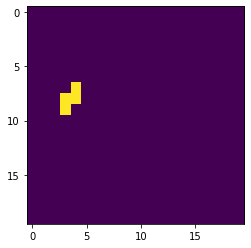

traversing nodes in reverse order  9 3
traversing nodes  8 3
traversing nodes  8 4
traversing nodes  7 4
Blocked at node  8 4


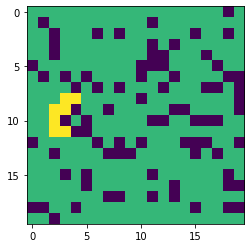

new current node is 8 4
current node 8 5
current node 9 5
current node 8 6
current node 9 6
current node 8 7
current node 10 5
current node 10 6
current node 9 7
current node 8 8
current node 11 5
current node 8 9
current node 12 5
current node 9 8
current node 10 7
current node 11 6
current node 11 7
current node 9 9
current node 12 6
current node 8 10
current node 13 5
current node 10 8
current node 12 7
current node 14 5
current node 10 9
current node 11 8
current node 8 11
current node 9 10
current node 13 6
current node 9 11
current node 14 6
current node 8 12
current node 11 9
current node 12 8
current node 15 5
current node 10 10
current node 13 7
current node 11 10
current node 13 8
current node 16 5
current node 9 12
current node 14 7
current node 12 9
current node 10 11
current node 15 6
current node 8 13
current node 17 5
current node 8 14
current node 11 11
current node 9 13
current node 15 7
current node 14 8
current node 16 6
current node 13 9
current node 12 10
current n

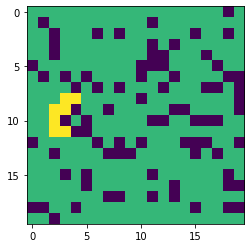

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1], [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1], [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1], [1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1], [1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1], [1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1], [1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1], [1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 

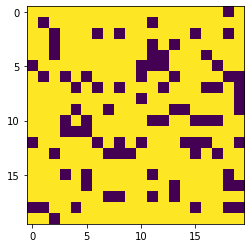

current node 12 3
current node 13 3
current node 12 4
current node 13 4
current node 12 5
current node 14 3
current node 14 4
current node 13 5
current node 12 6
current node 15 3
current node 12 7
current node 13 6
current node 14 5
current node 16 3
current node 15 4
current node 13 7
current node 12 8
current node 17 3
current node 15 5
current node 14 6
current node 16 4
current node 13 8
current node 14 7
current node 15 6
current node 17 4
current node 16 5
current node 12 9
current node 18 3
current node 17 5
current node 12 10
current node 19 3
current node 13 9
current node 18 4
current node 14 8
current node 16 6
current node 15 7
current node 16 7
current node 13 10
current node 12 11
current node 19 4
current node 14 9
current node 15 8
current node 18 5
current node 17 6
current node 18 6
current node 14 10
current node 13 11
current node 12 12
current node 19 5
current node 16 8
current node 15 9
current node 17 7
current node 17 8
current node 15 10
current node 12 13
cu

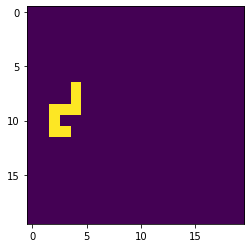

traversing nodes in reverse order  11 3
traversing nodes  11 2
traversing nodes  10 2
traversing nodes  9 2
traversing nodes  9 3
traversing nodes  9 4
Blocked at node  9 3


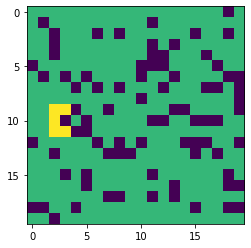

new current node is 9 3
current node 8 3
current node 7 3
current node 7 4
Goal node is reached
traversing nodes in reverse order  7 4
traversing nodes in reverse order  7 3
traversing nodes in reverse order  8 3


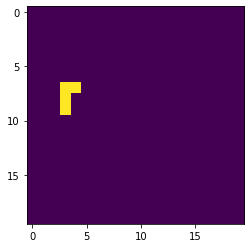

traversing nodes in reverse order  9 3
traversing nodes  8 3
traversing nodes  7 3
traversing nodes  7 4
Blocked at node  7 3


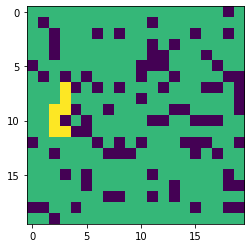

new current node is 7 3
current node 7 2
current node 8 2
current node 9 2
current node 10 2
current node 9 3
current node 11 2
current node 12 2
current node 11 3
current node 13 2
current node 12 3
current node 13 3
current node 12 4
current node 14 2
current node 12 5
current node 14 3
current node 13 4
current node 15 2
current node 13 5
current node 12 6
current node 15 3
current node 14 4
current node 16 2
current node 16 3
current node 15 4
current node 12 7
current node 13 6
current node 17 2
current node 14 5
current node 14 6
current node 17 3
current node 13 7
current node 18 2
current node 16 4
current node 12 8
current node 15 5
current node 12 9
current node 14 7
current node 18 3
current node 16 5
current node 17 4
current node 19 2
current node 15 6
current node 13 8
current node 19 3
current node 16 6
current node 12 10
current node 18 4
current node 15 7
current node 13 9
current node 14 8
current node 17 5
current node 15 8
current node 16 7
current node 13 10
curren

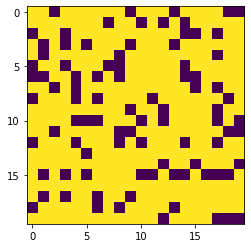

current node 10 8
current node 11 8
current node 12 8
current node 13 8
current node 12 9
current node 14 8
current node 13 9
current node 12 10
current node 14 9
current node 13 10
current node 12 11
current node 15 8
current node 12 12
current node 14 10
current node 13 11
current node 16 8
current node 15 9
current node 14 11
current node 13 12
current node 12 13
current node 15 10
current node 16 9
current node 17 8
current node 17 9
current node 16 10
current node 12 14
current node 14 12
current node 18 8
current node 13 13
current node 15 11
current node 14 13
current node 19 8
current node 18 9
current node 13 14
current node 15 12
current node 17 10
current node 12 15
current node 16 11
current node 14 14
current node 19 9
current node 12 16
current node 18 10
current node 17 11
current node 15 13
current node 16 12
current node 13 15
current node 14 15
current node 12 17
current node 18 11
current node 19 10
current node 13 16
current node 15 14
current node 16 13
current nod

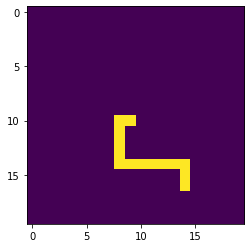

traversing nodes in reverse order  10 9
traversing nodes  10 8
traversing nodes  11 8
Blocked at node  10 8


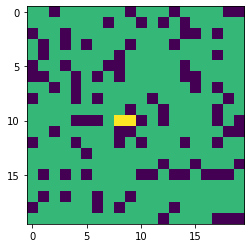

new current node is 10 8
current node 10 9
current node 9 8
current node 10 7
current node 11 7
current node 12 7
current node 13 7
current node 14 7
current node 13 8
current node 15 7
current node 14 8
current node 13 9
current node 15 8
current node 14 9
current node 13 10
current node 16 7
current node 13 11
current node 15 9
current node 14 10
current node 17 7
current node 16 8
current node 15 10
current node 14 11
current node 17 8
current node 13 12
current node 16 9
current node 18 7
current node 15 11
current node 13 13
current node 14 12
current node 18 8
current node 19 7
current node 17 9
current node 16 10
current node 17 10
current node 14 13
current node 13 14
current node 19 8
current node 16 11
current node 15 12
current node 18 9
current node 17 11
current node 15 13
current node 14 14
current node 13 15
current node 18 10
current node 16 12
current node 19 9
current node 14 15
current node 16 13
current node 13 16
current node 19 10
current node 15 14
current node 1

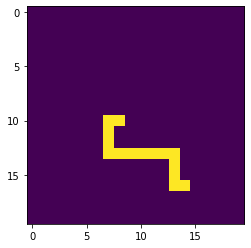

traversing nodes in reverse order  10 8
traversing nodes  10 7
traversing nodes  11 7
traversing nodes  12 7
traversing nodes  13 7
traversing nodes  13 8
traversing nodes  13 9
traversing nodes  13 10
traversing nodes  13 11
traversing nodes  13 12
traversing nodes  13 13
traversing nodes  14 13
traversing nodes  15 13
Blocked at node  14 13


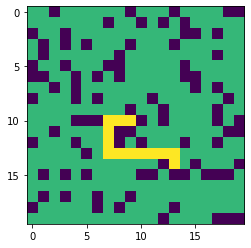

new current node is 14 13
current node 14 14
current node 14 15
current node 15 15
current node 14 16
current node 15 16
current node 14 17
current node 16 15
current node 16 16
current node 15 17
current node 14 18
current node 17 15
current node 14 19
current node 18 15
current node 15 18
current node 17 16
current node 16 17
current node 15 19
current node 19 15
current node 18 16
current node 16 18
current node 17 17
current node 16 19
current node 19 16
current node 18 17
current node 17 18
current node 18 18
current node 17 19
current node 19 17
current node 18 19
current node 19 18
current node 19 19
current node 13 13
current node 13 14
current node 13 15
current node 13 16
current node 13 17
Goal node is reached
traversing nodes in reverse order  16 14
traversing nodes in reverse order  16 15
traversing nodes in reverse order  15 15
traversing nodes in reverse order  14 15
traversing nodes in reverse order  14 14


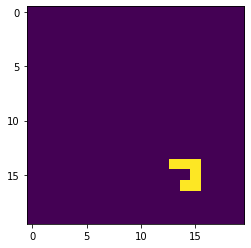

traversing nodes in reverse order  14 13
traversing nodes  14 14
traversing nodes  14 15
Blocked at node  14 14


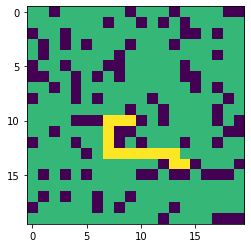

new current node is 14 14
current node 13 14
current node 14 13
current node 13 15
current node 13 16
current node 14 16
current node 13 17
current node 14 17
current node 15 16
current node 13 18
current node 14 18
current node 15 17
current node 13 19
current node 16 16
current node 14 19
current node 16 17
current node 17 16
current node 15 18
current node 15 19
current node 16 18
current node 18 16
current node 17 17
current node 17 18
current node 16 19
current node 19 16
current node 18 17
current node 18 18
current node 17 19
current node 19 17
current node 19 18
current node 18 19
current node 19 19
current node 12 14
current node 13 13
current node 12 15
current node 12 16
current node 12 17
current node 12 18
current node 15 15
current node 16 15
current node 12 19
current node 17 15
current node 18 15
current node 19 15
current node 13 12
current node 12 13
current node 11 14
current node 11 15
current node 11 16
current node 11 17
current node 11 18
current node 16 14
Goal 

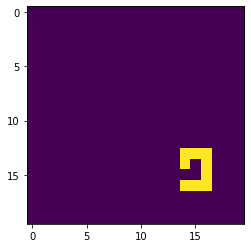

traversing nodes in reverse order  14 14
traversing nodes  13 14
traversing nodes  13 15
traversing nodes  13 16
traversing nodes  14 16
traversing nodes  15 16
Blocked at node  14 16


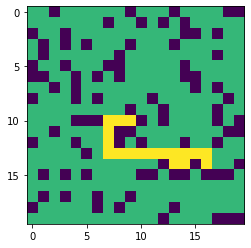

new current node is 14 16
current node 14 17
current node 14 18
current node 15 18
current node 14 19
current node 15 19
current node 16 18
current node 16 19
current node 17 18
current node 17 19
current node 18 18
current node 18 19
current node 19 18
current node 19 19
current node 13 16
current node 13 17
current node 13 18
current node 13 19
current node 16 17
current node 17 17
current node 18 17
current node 19 17
current node 13 15
current node 12 16
current node 12 17
current node 12 18
current node 12 19
current node 16 16
current node 17 16
current node 18 16
current node 19 16
current node 11 16
current node 13 14
current node 12 15
current node 11 17
current node 14 14
current node 11 18
current node 11 19
current node 16 15
current node 17 15
current node 18 15
current node 19 15
current node 13 13
current node 10 16
current node 11 15
current node 14 13
current node 10 17
current node 10 18
current node 10 19
current node 16 14
Goal node is reached
traversing nodes in re

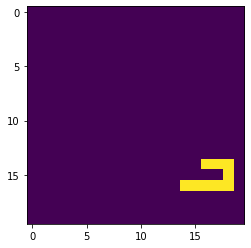

traversing nodes in reverse order  14 16
traversing nodes  14 17
traversing nodes  14 18
traversing nodes  15 18
Blocked at node  14 18


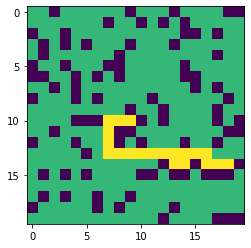

new current node is 14 18
current node 13 18
current node 14 17
current node 13 19
current node 14 16
current node 13 17
current node 12 18
current node 12 19
current node 11 18
current node 12 17
current node 13 16
current node 11 19
current node 13 15
current node 12 16
current node 11 17
current node 10 18
current node 10 19
current node 9 18
current node 10 17
current node 11 16
current node 12 15
current node 13 14
current node 9 19
current node 14 14
current node 13 13
current node 8 18
current node 11 15
current node 9 17
current node 10 16
current node 14 13
current node 8 19
current node 7 18
current node 10 15
current node 12 13
current node 9 16
current node 11 14
current node 13 12
current node 8 17
current node 7 19
current node 9 15
current node 13 11
current node 10 14
current node 7 17
current node 11 13
current node 12 12
current node 8 16
current node 6 18
current node 6 19
current node 14 11
current node 15 11
current node 16 11
current node 15 12
current node 17 11


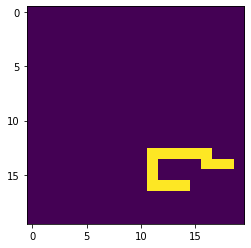

traversing nodes in reverse order  14 18
traversing nodes  14 17
traversing nodes  14 16
traversing nodes  13 16
traversing nodes  13 15
traversing nodes  13 14
traversing nodes  13 13
traversing nodes  13 12
traversing nodes  13 11
traversing nodes  14 11
traversing nodes  15 11
Blocked at node  14 11


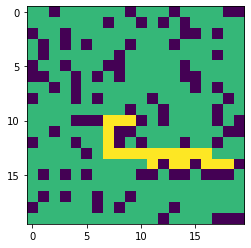

new current node is 14 11
current node 13 11
current node 14 10
current node 13 12
current node 13 13
current node 14 13
current node 13 14
current node 14 14
current node 13 15
current node 13 16
current node 14 16
current node 13 17
current node 14 17
current node 13 18
current node 14 18
current node 13 19
current node 13 10
current node 12 11
current node 14 9
current node 12 12
current node 15 9
current node 12 13
current node 16 9
current node 17 9
current node 16 10
current node 12 15
current node 18 9
current node 17 10
current node 16 11
current node 12 16
current node 16 12
current node 19 9
current node 18 10
current node 17 11
current node 16 13
current node 19 10
current node 18 11
current node 17 12
current node 12 17
current node 12 18
Goal node is reached
traversing nodes in reverse order  16 14
traversing nodes in reverse order  16 13
traversing nodes in reverse order  16 12
traversing nodes in reverse order  16 11
traversing nodes in reverse order  16 10
traversing no

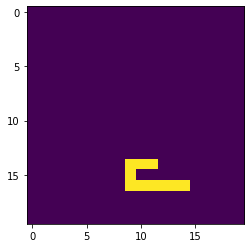

traversing nodes in reverse order  14 11
traversing nodes  14 10
traversing nodes  14 9
traversing nodes  15 9
traversing nodes  16 9
traversing nodes  16 10
traversing nodes  16 11
traversing nodes  16 12
traversing nodes  16 13
traversing nodes  16 14


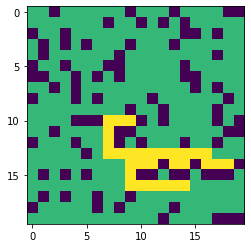

new current node is 16 14
Total number of expanded nodes in the search process  342
[[1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1], [1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1], [-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1], [1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1], [1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1], [-1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1], [-1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1], [1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1], [-1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1], [1, 1, 1, 1, -1, -1, -1, 2, 2, 2, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1], [1, 1, -1, 1, 1, 1, 1, 2, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1], [-1, 1, 1, 1, -1, 1, 1, 2, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1], [1, 1, 1, 1, 1, -1, 1, 2, 2, 2, 2, 2, 2, 2, 2

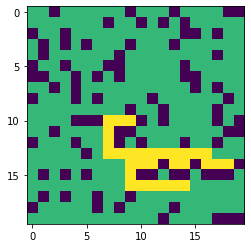

[[1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1], [1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1], [-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1], [1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1], [1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1], [-1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1], [-1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1], [1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1], [-1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1], [1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1], [1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1], [-1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1], [1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1], [

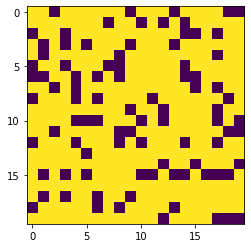

current node 10 8
current node 11 8
current node 12 8
current node 13 8
current node 12 9
current node 14 8
current node 13 9
current node 12 10
current node 14 9
current node 13 10
current node 12 11
current node 15 8
current node 12 12
current node 14 10
current node 13 11
current node 16 8
current node 15 9
current node 14 11
current node 13 12
current node 12 13
current node 15 10
current node 16 9
current node 17 8
current node 17 9
current node 16 10
current node 12 14
current node 14 12
current node 18 8
current node 13 13
current node 15 11
current node 14 13
current node 19 8
current node 18 9
current node 13 14
current node 15 12
current node 17 10
current node 12 15
current node 16 11
current node 14 14
current node 19 9
current node 12 16
current node 18 10
current node 17 11
current node 15 13
current node 16 12
current node 13 15
current node 14 15
current node 12 17
current node 18 11
current node 19 10
current node 13 16
current node 15 14
current node 16 13
current nod

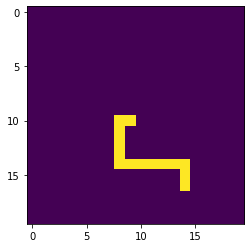

traversing nodes in reverse order  10 9
traversing nodes  10 8
traversing nodes  11 8
Blocked at node  10 8


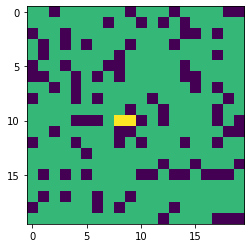

new current node is 10 8
current node 10 9
current node 9 8
current node 10 7
current node 11 7
current node 12 7
current node 13 7
current node 14 7
current node 15 7
current node 16 7
current node 17 7
current node 18 7
current node 19 7
current node 9 7
current node 10 6
current node 8 8
current node 11 6
current node 8 9
current node 12 6
current node 8 10
current node 13 6
current node 13 8
current node 8 11
current node 9 10
current node 13 9
current node 9 11
current node 8 12
current node 14 6
current node 14 8
current node 14 9
current node 9 12
current node 8 13
current node 13 10
current node 10 11
current node 15 8
current node 15 6
current node 8 14
current node 15 9
current node 9 13
current node 14 10
current node 10 12
current node 16 6
current node 16 8
current node 13 11
current node 11 11
current node 11 12
current node 8 15
current node 14 11
current node 10 13
current node 16 9
current node 17 6
current node 17 8
current node 15 10
current node 13 12
current node 9

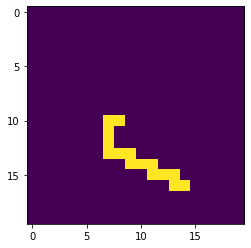

traversing nodes in reverse order  10 8
traversing nodes  10 7
traversing nodes  11 7
traversing nodes  12 7
traversing nodes  13 7
traversing nodes  13 8
traversing nodes  13 9
traversing nodes  14 9
traversing nodes  14 10
traversing nodes  14 11
traversing nodes  15 11
Blocked at node  14 11


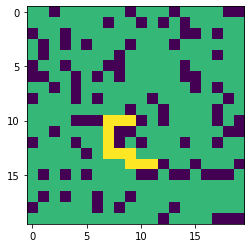

new current node is 14 11
current node 13 11
current node 14 10
current node 13 12
current node 12 11
current node 13 13
current node 12 12
current node 12 13
current node 14 13
current node 13 14
current node 12 14
current node 14 14
current node 15 14
current node 16 14
Goal node is reached
traversing nodes in reverse order  16 14
traversing nodes in reverse order  15 14
traversing nodes in reverse order  14 14
traversing nodes in reverse order  14 13
traversing nodes in reverse order  13 13
traversing nodes in reverse order  13 12
traversing nodes in reverse order  13 11


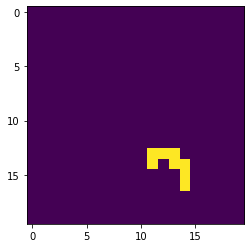

traversing nodes in reverse order  14 11
traversing nodes  13 11
traversing nodes  13 12
traversing nodes  13 13
traversing nodes  14 13
traversing nodes  14 14
traversing nodes  15 14
Blocked at node  14 14


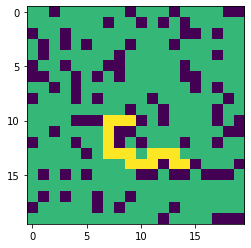

new current node is 14 14
current node 13 14
current node 13 15
current node 13 16
current node 14 16
current node 13 17
current node 15 16
current node 14 17
current node 13 18
current node 15 17
current node 13 19
current node 14 18
current node 16 16
current node 16 17
current node 14 19
current node 15 18
current node 17 16
current node 15 19
current node 17 17
current node 18 16
current node 16 18
current node 16 19
current node 18 17
current node 17 18
current node 19 16
current node 18 18
current node 17 19
current node 19 17
current node 19 18
current node 18 19
current node 19 19
current node 14 13
current node 12 14
current node 12 15
current node 12 16
current node 12 17
current node 12 18
current node 15 15
current node 16 15
current node 12 19
current node 17 15
current node 18 15
current node 19 15
current node 13 13
current node 11 14
current node 12 13
current node 11 15
current node 11 16
current node 11 17
current node 11 18
current node 11 19
Goal node is reached
tra

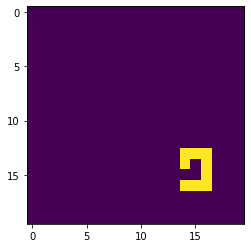

traversing nodes in reverse order  14 14
traversing nodes  13 14
traversing nodes  13 15
traversing nodes  13 16
traversing nodes  14 16
traversing nodes  15 16
Blocked at node  14 16


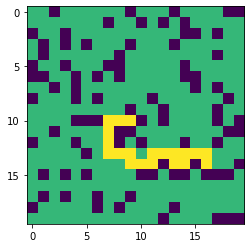

new current node is 14 16
current node 14 17
current node 14 18
current node 15 18
current node 16 18
current node 15 19
current node 14 19
current node 17 18
current node 17 17
current node 16 19
current node 18 18
current node 17 19
current node 19 18
current node 18 19
current node 19 19
current node 13 16
current node 13 17
current node 12 16
current node 13 18
current node 12 17
current node 11 16
current node 12 18
current node 11 17
current node 10 16
current node 13 19
current node 16 17
current node 12 19
current node 11 19
current node 10 17
current node 11 18
current node 10 18
current node 10 19
current node 18 17
current node 18 16
current node 19 17
current node 13 15
current node 12 15
current node 11 15
current node 10 15
current node 9 16
current node 9 17
current node 16 16
current node 17 16
current node 17 15
current node 17 14
current node 18 14
current node 19 14
current node 16 15
current node 16 14
Goal node is reached
traversing nodes in reverse order  16 14
tr

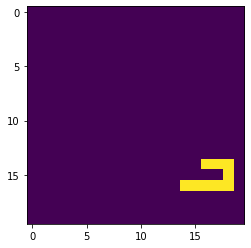

traversing nodes in reverse order  14 16
traversing nodes  14 17
traversing nodes  14 18
traversing nodes  15 18
Blocked at node  14 18


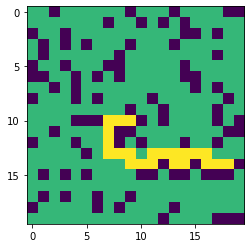

new current node is 14 18
current node 13 18
current node 12 18
current node 13 19
current node 12 19
current node 11 18
current node 11 19
current node 10 18
current node 10 19
current node 9 18
current node 9 19
current node 14 17
current node 14 16
current node 13 17
current node 12 17
current node 11 17
current node 10 17
current node 8 18
current node 9 17
current node 8 19
current node 13 16
current node 12 16
current node 13 15
current node 13 14
current node 14 14
current node 13 13
current node 14 13
current node 11 16
current node 12 15
current node 10 16
current node 11 15
current node 10 15
current node 11 14
current node 7 18
current node 8 17
current node 9 16
current node 12 13
current node 13 12
current node 7 19
current node 13 11
current node 12 12
current node 11 13
current node 10 14
current node 6 18
current node 7 17
current node 8 16
current node 9 15
current node 6 19
current node 14 11
current node 8 15
current node 11 12
current node 13 10
current node 5 18
cu

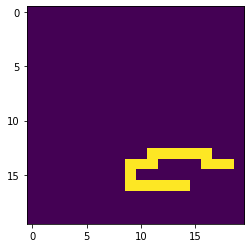

traversing nodes in reverse order  14 18
traversing nodes  14 17
traversing nodes  14 16
traversing nodes  13 16
traversing nodes  13 15
traversing nodes  13 14
traversing nodes  13 13
traversing nodes  13 12
traversing nodes  13 11
traversing nodes  14 11
traversing nodes  14 10
traversing nodes  14 9
traversing nodes  15 9
traversing nodes  16 9
traversing nodes  16 10
traversing nodes  16 11
traversing nodes  16 12
traversing nodes  16 13
traversing nodes  16 14


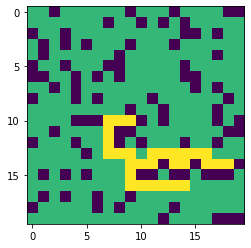

new current node is 16 14
Total number of expanded nodes in the search process  393
[[1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1], [1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1], [1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1], [1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1], [1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1], [1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 

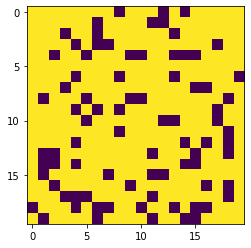

current node 10 19
current node 11 19
current node 12 19
current node 13 19
current node 14 19
current node 15 19
current node 16 19
current node 17 19
current node 18 19
current node 19 19
current node 9 18
current node 8 19
current node 10 18
current node 11 18
current node 12 18
current node 13 18
current node 14 18
current node 15 18
current node 16 18
current node 17 18
current node 18 18
current node 19 18
current node 9 17
current node 8 18
current node 7 19
current node 10 17
current node 11 17
current node 12 17
current node 13 17
current node 14 17
current node 15 17
current node 16 17
current node 17 17
current node 18 17
current node 19 17
current node 8 17
current node 6 19
current node 7 18
current node 9 16
current node 10 16
current node 11 16
current node 12 16
current node 13 16
current node 14 16
current node 15 16
current node 16 16
current node 17 16
current node 18 16
current node 19 16
current node 5 19
current node 7 17
current node 6 18
current node 9 15
curren

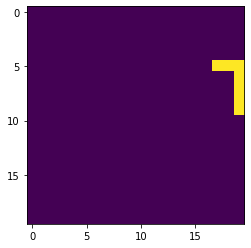

traversing nodes in reverse order  9 19
traversing nodes  8 19
traversing nodes  7 19
traversing nodes  6 19
Blocked at node  7 19


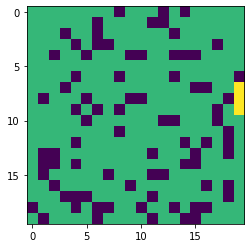

new current node is 7 19
current node 8 19
current node 9 19
current node 10 19
current node 11 19
current node 12 19
current node 13 19
current node 14 19
current node 15 19
current node 16 19
current node 17 19
current node 18 19
current node 19 19
current node 7 18
current node 9 18
current node 10 18
current node 11 18
current node 12 18
current node 13 18
current node 14 18
current node 15 18
current node 16 18
current node 17 18
current node 18 18
current node 19 18
current node 7 17
current node 6 18
current node 8 17
current node 9 17
current node 10 17
current node 11 17
current node 12 17
current node 13 17
current node 14 17
current node 15 17
current node 16 17
current node 17 17
current node 18 17
current node 19 17
current node 7 16
current node 6 17
current node 5 18
current node 8 16
current node 5 19
current node 9 16
current node 10 16
current node 11 16
current node 12 16
current node 13 16
current node 14 16
current node 15 16
current node 16 16
current node 17 16
c

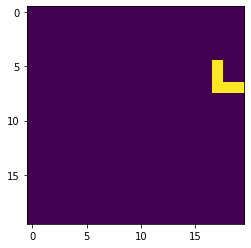

traversing nodes in reverse order  7 19
traversing nodes  7 18
traversing nodes  7 17
traversing nodes  6 17
traversing nodes  5 17


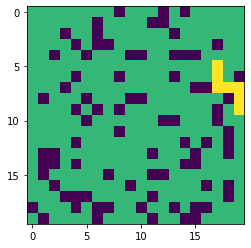

new current node is 5 17
Total number of expanded nodes in the search process  136
[[1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1], [1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1], [1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 2, 1, -1], [1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 2, 2, 2], [1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 2], [1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 2], [1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1], [1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1

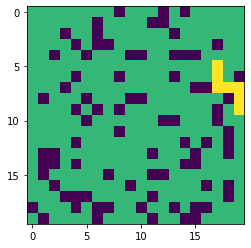

[[1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1], [1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1], [1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1], [1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1], [1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1], [1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1], [1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1], [1, -1, 1, 1,

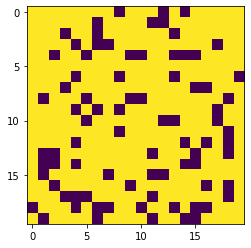

current node 10 19
current node 11 19
current node 12 19
current node 13 19
current node 14 19
current node 15 19
current node 16 19
current node 17 19
current node 18 19
current node 19 19
current node 9 18
current node 8 19
current node 10 18
current node 11 18
current node 12 18
current node 13 18
current node 14 18
current node 15 18
current node 16 18
current node 17 18
current node 18 18
current node 19 18
current node 9 17
current node 8 18
current node 7 19
current node 10 17
current node 11 17
current node 12 17
current node 13 17
current node 14 17
current node 15 17
current node 16 17
current node 17 17
current node 18 17
current node 19 17
current node 8 17
current node 6 19
current node 7 18
current node 9 16
current node 10 16
current node 11 16
current node 12 16
current node 13 16
current node 14 16
current node 15 16
current node 16 16
current node 17 16
current node 18 16
current node 19 16
current node 5 19
current node 7 17
current node 6 18
current node 9 15
curren

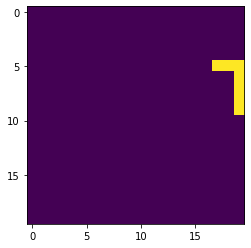

traversing nodes in reverse order  9 19
traversing nodes  8 19
traversing nodes  7 19
traversing nodes  6 19
Blocked at node  7 19


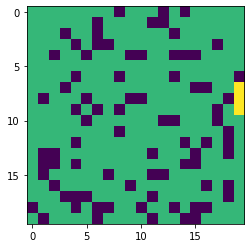

new current node is 7 19
current node 7 18
current node 6 18
current node 7 17
current node 5 18
current node 4 18
Goal node is reached
traversing nodes in reverse order  5 17
traversing nodes in reverse order  5 18
traversing nodes in reverse order  6 18
traversing nodes in reverse order  7 18


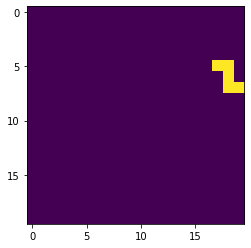

traversing nodes in reverse order  7 19
traversing nodes  7 18
traversing nodes  6 18
traversing nodes  5 18
traversing nodes  5 17


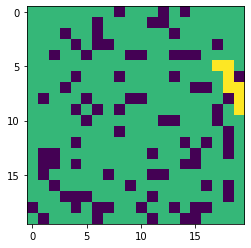

new current node is 5 17
Total number of expanded nodes in the search process  86
[[1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1], [1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1], [1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1], [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1], [-1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1], [1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1

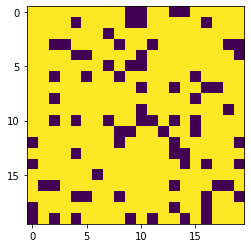

current node 4 3
current node 3 4
current node 5 3
current node 3 5
current node 4 4
current node 6 3
current node 5 4
current node 3 6
current node 4 5
current node 4 6
current node 3 7
current node 5 5
current node 6 4
current node 7 3
current node 7 4
current node 5 6
current node 3 8
current node 8 3
current node 4 7
current node 6 5
current node 3 9
current node 8 4
current node 5 7
current node 7 5
current node 4 8
current node 9 3
current node 6 6
current node 6 7
current node 10 3
current node 3 10
current node 5 8
current node 9 4
current node 7 6
current node 8 5
current node 4 9
current node 10 4
current node 4 10
current node 3 11
current node 8 6
current node 6 8
current node 11 3
current node 7 7
current node 9 5
current node 5 9
current node 11 4
current node 9 6
current node 8 7
current node 7 8
current node 10 5
current node 4 11
current node 5 10
current node 12 3
current node 3 12
current node 6 9
current node 11 5
current node 10 6
current node 3 13
current node 5 1

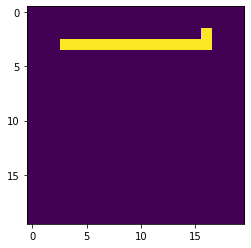

traversing nodes in reverse order  3 3
traversing nodes  3 4
traversing nodes  3 5
traversing nodes  3 6
traversing nodes  3 7
traversing nodes  3 8
Blocked at node  3 7


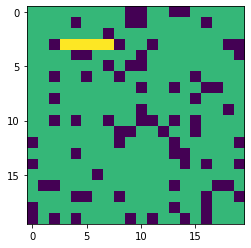

new current node is 3 7
current node 4 7
current node 5 7
current node 4 8
current node 5 8
current node 4 9
current node 6 7
current node 6 8
current node 5 9
current node 4 10
current node 7 7
current node 4 11
current node 5 10
current node 6 9
current node 8 7
current node 7 8
current node 5 11
current node 4 12
current node 9 7
current node 7 9
current node 6 10
current node 8 8
current node 5 12
current node 6 11
current node 7 10
current node 9 8
current node 8 9
current node 4 13
current node 10 7
current node 9 9
current node 4 14
current node 11 7
current node 5 13
current node 10 8
current node 6 12
current node 8 10
current node 7 11
current node 8 11
current node 4 15
current node 12 7
current node 11 8
current node 7 12
current node 10 9
current node 9 10
current node 5 14
current node 6 13
current node 6 14
current node 13 7
current node 12 8
current node 11 9
current node 7 13
current node 4 16
current node 5 15
current node 8 12
current node 9 11
current node 10 10
cur

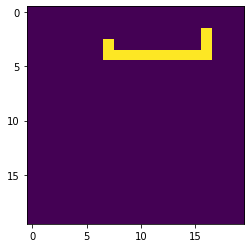

traversing nodes in reverse order  3 7
traversing nodes  4 7
traversing nodes  4 8
traversing nodes  4 9
traversing nodes  4 10
Blocked at node  4 9


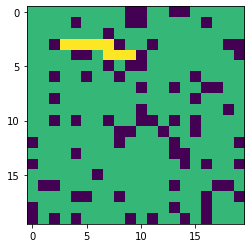

new current node is 4 9
current node 3 9
current node 4 8
current node 3 10
current node 5 8
current node 3 11
current node 6 8
current node 3 12
current node 4 11
current node 7 8
current node 6 9
current node 3 13
current node 7 9
current node 6 10
current node 5 11
current node 4 12
current node 8 8
current node 8 9
current node 3 14
current node 4 13
current node 9 8
current node 5 12
current node 7 10
current node 6 11
current node 3 15
current node 8 10
current node 6 12
current node 7 11
current node 4 14
current node 10 8
current node 5 13
current node 9 9
current node 10 9
current node 3 16
current node 8 11
current node 11 8
current node 4 15
current node 9 10
current node 5 14
current node 7 12
current node 6 13
current node 7 13
current node 4 16
current node 3 17
current node 8 12
current node 9 11
current node 6 14
current node 11 9
current node 10 10
current node 12 8
current node 5 15
current node 3 18
current node 9 12
current node 10 11
current node 13 8
current node 

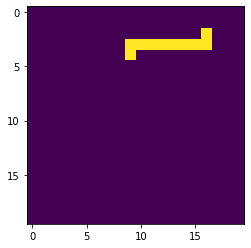

traversing nodes in reverse order  4 9
traversing nodes  3 9
traversing nodes  3 10
traversing nodes  3 11
Blocked at node  3 10


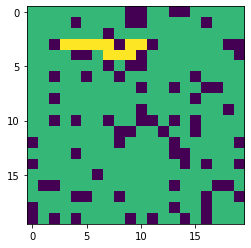

new current node is 3 10
current node 2 10
current node 3 9
current node 2 11
current node 4 9
current node 2 12
current node 3 12
current node 2 13
current node 4 12
current node 3 13
current node 2 14
current node 4 13
current node 2 15
current node 3 14
current node 5 12
current node 5 13
Goal node is reached
traversing nodes in reverse order  2 16
traversing nodes in reverse order  2 15
traversing nodes in reverse order  2 14
traversing nodes in reverse order  2 13
traversing nodes in reverse order  2 12
traversing nodes in reverse order  2 11
traversing nodes in reverse order  2 10


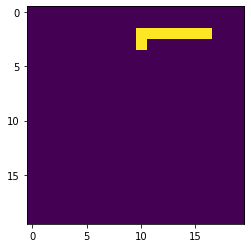

traversing nodes in reverse order  3 10
traversing nodes  2 10
traversing nodes  2 11
traversing nodes  2 12
traversing nodes  2 13
traversing nodes  2 14
traversing nodes  2 15
traversing nodes  2 16


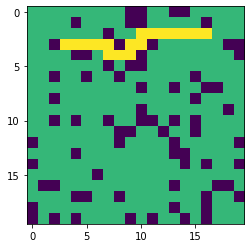

new current node is 2 16
Total number of expanded nodes in the search process  796
[[1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1], [1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1], [1, 1, -1, 2, 2, 2, 2, 2, -1, 2, 2, -1, 1, 1, 1, 1, 1, 1, -1, -1], [1, 1, 1, 1, -1, -1, 1, 2, 2, 2, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1], [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1], [-1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1], [1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1

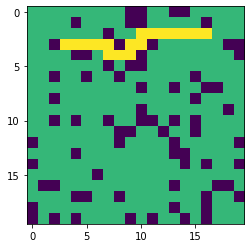

[[1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1], [1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1], [1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1], [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1], [-1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1], [1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1], [1, 1, 1, 1, 

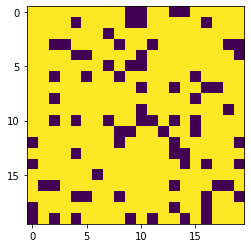

current node 4 3
current node 3 4
current node 5 3
current node 3 5
current node 4 4
current node 6 3
current node 5 4
current node 3 6
current node 4 5
current node 4 6
current node 3 7
current node 5 5
current node 6 4
current node 7 3
current node 7 4
current node 5 6
current node 3 8
current node 8 3
current node 4 7
current node 6 5
current node 3 9
current node 8 4
current node 5 7
current node 7 5
current node 4 8
current node 9 3
current node 6 6
current node 6 7
current node 10 3
current node 3 10
current node 5 8
current node 9 4
current node 7 6
current node 8 5
current node 4 9
current node 10 4
current node 4 10
current node 3 11
current node 8 6
current node 6 8
current node 11 3
current node 7 7
current node 9 5
current node 5 9
current node 11 4
current node 9 6
current node 8 7
current node 7 8
current node 10 5
current node 4 11
current node 5 10
current node 12 3
current node 3 12
current node 6 9
current node 11 5
current node 10 6
current node 3 13
current node 5 1

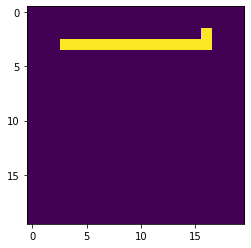

traversing nodes in reverse order  3 3
traversing nodes  3 4
traversing nodes  3 5
traversing nodes  3 6
traversing nodes  3 7
traversing nodes  3 8
Blocked at node  3 7


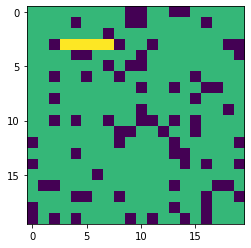

new current node is 3 7
current node 4 7
current node 5 7
current node 4 8
current node 5 8
current node 4 9
current node 6 7
current node 6 8
current node 5 9
current node 4 10
current node 7 7
current node 4 11
current node 5 10
current node 6 9
current node 8 7
current node 7 8
current node 5 11
current node 4 12
current node 9 7
current node 7 9
current node 6 10
current node 8 8
current node 5 12
current node 6 11
current node 7 10
current node 9 8
current node 8 9
current node 4 13
current node 10 7
current node 9 9
current node 4 14
current node 11 7
current node 5 13
current node 10 8
current node 6 12
current node 8 10
current node 7 11
current node 8 11
current node 9 11
current node 8 12
current node 11 8
current node 12 8
current node 11 9
current node 7 12
current node 7 13
current node 4 15
current node 5 15
current node 4 16
current node 12 7
current node 13 7
current node 10 9
current node 10 10
current node 5 14
current node 6 14
current node 9 10
current node 6 13
cur

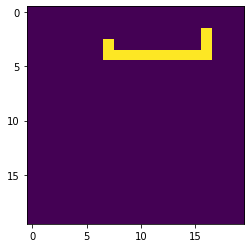

traversing nodes in reverse order  3 7
traversing nodes  4 7
traversing nodes  4 8
traversing nodes  4 9
traversing nodes  4 10
Blocked at node  4 9


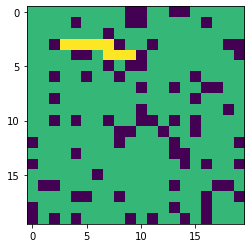

new current node is 4 9
current node 3 9
current node 2 9
current node 3 10
current node 2 10
current node 3 11
current node 1 9
current node 2 8
current node 2 11
current node 3 12
current node 1 10
current node 1 11
current node 2 12
current node 3 13
current node 1 12
current node 2 13
current node 3 14
current node 1 13
current node 2 14
current node 2 15
current node 2 16
Goal node is reached
traversing nodes in reverse order  2 16
traversing nodes in reverse order  2 15
traversing nodes in reverse order  2 14
traversing nodes in reverse order  2 13
traversing nodes in reverse order  2 12
traversing nodes in reverse order  2 11
traversing nodes in reverse order  2 10
traversing nodes in reverse order  2 9
traversing nodes in reverse order  3 9


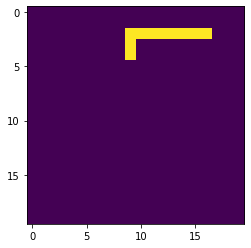

traversing nodes in reverse order  4 9
traversing nodes  3 9
traversing nodes  2 9
traversing nodes  2 10
traversing nodes  2 11
traversing nodes  2 12
traversing nodes  2 13
traversing nodes  2 14
traversing nodes  2 15
traversing nodes  2 16


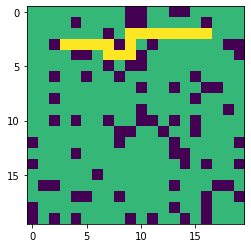

new current node is 2 16
Total number of expanded nodes in the search process  581
Expanded nodes array 1  [558, 848, 342, 136, 796]
Expanded nodes array 2  [335, 757, 393, 86, 581]


In [0]:

expanded_nodes_length_1 = []
expanded_nodes_length_2 = []
for k in range(0,5):
    size = 20
    maze = [0] * size
    maze_for_second_run = [0] * size
    visited = [0] * size

    for i in range(0,size):
        maze[i] = [0] * size
        maze_for_second_run[i] = [0] * size

    for i in range(0,size):
        visited[i] = [0] * size
                            
    i = 0
    j = 0

    while True:
        generate_random_matrix(maze,visited,i,j)
        i,j = get_unvisited_indices(visited)
        if i == -1 and j == -1:
            break

    for i in range(0,size):
        for j in range(0,size):
            maze_for_second_run[i][j] = maze[i][j]


    # maze = [[1, -1, 1, 1, 1], [1, 1, 1, 1, 1], [-1, 1, -1, 1, -1], [1, 1, 1, -1, -1], [1, 1, 1, 1, 1]]
    # maze = [[1, 1, 1, 1, 1], [1, -1, 1, 1, -1], [1, 1, 1, -1, 1], [1, -1, -1, 1, 1], [1, 1, 1, 1, 1]]
    # maze = [[1, 1, 1, -1, 1], [-1, -1, 1, -1, 1], [1, -1, 1, 1, -1], [1, -1, 1, 1, -1], [1, 1, 1, 1, 1]]
    # maze = [[1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1], [1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1], [1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1], [1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1], [1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1], [1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1], [-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1], [1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1], [1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1], [1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1]]
    # 350 674
    #maze = [[1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1], [1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1], [1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1], [1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1], [1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1], [1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1], [1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1], [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1], [1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1], [1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1], [-1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1], [-1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1]]
    # 792 373
    # maze = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1], [1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1], [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1], [-1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1], [1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1], [1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1], [1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1], [1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1], [1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1], [1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1], [1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1], [1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
    # 370   393
    #maze = [[1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1], [-1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1], [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1], [1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1], [1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1], [1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1], [1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1], [1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1], [1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1], [1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1], [1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
    # 548   848
    # maze = [[1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1], [1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1], [1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1], [1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1], [1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1], [-1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1], [1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1], [1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1], [1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1]]
    # 882  480

    nodes = [0] * size

    source_i = random.randint(0,size - 1)
    source_j = random.randint(0,size - 1)

    destination_i = random.randint(0,size - 1)
    destination_j = random.randint(0,size - 1)
    
    largerG = False
    
    for i in range(0,size):
        nodes[i] = [0] * size

    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,(destination_i - 1 - i) + (destination_j -1 - j),None,-1,largerG)


    # from queue import PriorityQueue
    # open_list = PriorityQueue()
    open_list = MinHeap()
    print(maze)
    showMaze(maze,1)
    # initial_maze = np.array(maze)

    # plt.imshow(initial_maze)
    # plt.show()

    adaptive = False
    
    total_expanded_nodes = AStarSearch(nodes,nodes[source_i][source_j],maze,nodes[destination_i][destination_j],open_list,adaptive)
    expanded_nodes_length_1.append(total_expanded_nodes)
    print(maze)
    showMaze(maze,1)


    open_list = MinHeap()
    print(maze_for_second_run)
    showMaze(maze_for_second_run,1)

    largerG = False
    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,(destination_i - 1 - i) + (destination_j -1 - j),None,-1,largerG)

    adaptive = True
    total_expanded_nodes = AStarSearch(nodes,nodes[source_i][source_j],maze_for_second_run,nodes[destination_i][destination_j],open_list,adaptive)
    expanded_nodes_length_2.append(total_expanded_nodes)

print('Expanded nodes array 1 ',expanded_nodes_length_1)
print('Expanded nodes array 2 ',expanded_nodes_length_2)
    # maze = np.array(maze)

    # plt.imshow(maze)
    # # plt.gca().axes.get_yaxis().set_visible(False)
    # # plt.gca().axes.get_xaxis().set_visible(False)
    # locator = matplotlib.ticker.MultipleLocator(5)
    # plt.gca().yaxis.set_major_locator(locator)
    # formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
    # plt.gca().yaxis.set_major_formatter(formatter)
    # plt.show()



    #1.a Based on the f-value of the grid, while computing the path it chooses the grid with minimum f value. That is the reason why it takes a grid eat rather than north
    #1.b 

    #2.a




        # https://www.overleaf.com/project/5e4f0d98214ba00001e2d898




# New Section